# Machine Learning
# Predicting Loan Repay (Phase 1)

## Tarun.S.Sarode

# Table of Content

### 1 - Introduction

- 1.1 -  Objective of the Project

- 1.2 -  Data Sets 

    - 1.2.1   -   Target Feature

    - 1.2.2   -   Descriptive Features

### 2 - Data Pro-processing	

- 2.1    -    Preliminaries

- 2.2    -    Data Cleaning and Transformation

    - 2.2.1   -   Continuous Features

    - 2.2.2   -   Categorical Features	

### 3 - Data Exploration						

- 3.1    -   Univariate Visualization 

- 3.2    -   Multivariate Visualization

    - 3.2.1   -   Barplot of Categorical Features Segregated by Income Level

    - 3.2.2   -   Barplot of Numeric Features Segregated by Income Level

    - 3.2.3   -   Interaction between Categorical and Numeric Features

    - 3.2.4   -   Pairwise Scatter Plots between Two Numeric Features

    - 3.2.5   -   Matrix Scatter Plots between all the Numeric Features

### 4 - Summary

# 1 - Introduction

## 1.1 - Objective of the Project

The aim of this project is to predict whether a person is eligible for a loan on basis of various descriptive features (Applicant’s Income, whether the person is self-employed). 

The dataset is taken from https://www.kaggle.com/sanket5/loan-prediction-binary-class-problem/notebook. 

This project has two phases:-

-In phase 1, we need to do the basic data Pre-processing and detailed descriptive statistical analysis of the data 

-Phase 2 we need to apply different ML algorithms.

This report includes both explanation as well as the Python codes for better understanding.


## 1.2 - Dataset

The Kaggle dataset contains 2 datasets i.e., train.csv and test.csv. We would be considering only the train dataset since test dataset does not contain the target feature in the dataset, which is a variable we aim to predict. The train dataset has 614 observations. It has 12 descriptive features and 1 target feature. 

## 1.2.1 - Target Feature

The target feature is Loan_Status which is a categorial feature. It has 2 classes i.e. Y or N, which makes it a binary classification. The aim is to predict whether the person gets the loan.Loan_Status- Yes, No  

## 1.2.2 - Descriptive Features

The variable description for the train.csv dataset are as follows:

- Loan_ID: Unique ID for every person.

- Gender: The gender attribute is divided into Male and Female.

- Married: Yes, No.

- Dependents: There are continuous.

- It defines the number of dependents.

- Education:states whether the person was a Graduate or not.

- Self_Employed: Yes, No.

- Applicant Income : continuous.

- It states the income of the person applying for the loan.

- Co-applicant Income: continuous.

- It states the income of the co-applicant of the person applying for the loan.

- LoanAmount: continuous.

- The amount that the loan has been applied for.

- Loan_Amount_Term: continuous.

- The number of years that the person wants to apply loan for.

- Credit_History: continuous.

- It states whether the person is credible for loan.

- Property_Area: Rural, Semi-urban, Urban.It states whether the person stays in the mentioned areas.

All the descriptive features are almost self-explanatory. 



# 2 - Data Pre-Processing

## 2.1 - Preliminaries

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file. The train.csv dataset is imported:

[1] URL = ( https://www.kaggle.com/sanket5/loan-prediction-dataset ) 

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('train.csv',sep=',')

## 2.2 - Data Cleaning and Transformation

In [3]:
#checking if the data is loaded as per the source file.
a.shape
#yes , it loaded as per the source file.

(614, 13)

In [4]:
# 1.2 Loading the first 5 rows of the dataset
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# we are changing the attributes names to simplify them. 
a.columns=['loanid','gender','married','dependents','education','self-employed','income', 
           'co-applicant-income','loan-amount','loan-duration','credit-history','property-area','loan-status']

In [6]:
a1=a

In [7]:
# Again loading the first 5 rows of the dataset after changing the names of the attributes
a1.head()

,loanid,gender,married,dependents,education,self-employed,income,co-applicant-income,loan-amount,loan-duration,credit-history,property-area,loan-status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# checking the datatypes of each attribute column
a1.dtypes

loanid                  object
gender                  object
married                 object
dependents              object
education               object
self-employed           object
income                   int64
co-applicant-income    float64
loan-amount            float64
loan-duration          float64
credit-history         float64
property-area           object
loan-status             object
dtype: object

In [9]:
# we would change the datatype of income column from int64 to float64 as it would consider the decimals and gives better results
a1['income'] = a1['income'].astype(int).astype('float64')

In [10]:
# We will again check the datatypes of each column after checking the type of the income column
a1.dtypes

loanid                  object
gender                  object
married                 object
dependents              object
education               object
self-employed           object
income                 float64
co-applicant-income    float64
loan-amount            float64
loan-duration          float64
credit-history         float64
property-area           object
loan-status             object
dtype: object

we are using strip to remove the white spaces which is a good practice to ensure that there is no white spaces in the datas set.


In [11]:
a1['loanid']=a1['loanid'].str.strip(' ')
a1['gender']=a1['gender'].str.strip(' ')
a1['married']=a1['married'].str.strip(' ')
a1['dependents']=a1['dependents'].str.strip(' ')
a1['education']=a1['education'].str.strip(' ')
a1['self-employed']=a1['self-employed'].str.strip(' ')
a1['property-area']=a1['property-area'].str.strip(' ')
a1['loan-status']=a1['loan-status'].str.strip(' ')

converting all the characters to lower case as to ensure there is consistency in the dataset

In [12]:

a1['loanid']=a1['loanid'].str.lower()
a1['gender']=a1['gender'].str.lower()
a1['married']=a1['married'].str.lower()
a1['dependents']=a1['dependents'].str.lower()
a1['education']=a1['education'].str.lower()
a1['self-employed']=a1['self-employed'].str.lower()
a1['property-area']=a1['property-area'].str.lower()
a1['loan-status']=a1['loan-status'].str.lower()

## 2.2.1 - Continuous Features

- Step 1: Plot each continuous variables using histogram and boxplot to check for the outliers.

- Step 2: Replace the outliers with mean.

- Step 3: Plot again and check whether the outliers are removed.

- Step 4: Replace the NaN values with the respective columns mean.



In [13]:
# Checking the core statistics for the continuous features column.
a1.describe()

,income,co-applicant-income,loan-amount,loan-duration,credit-history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### > INCOME ATTRIBUTE 

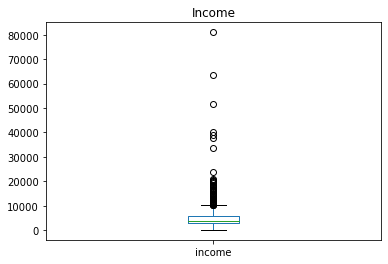

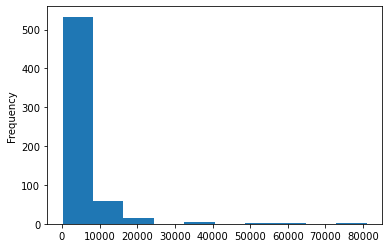

In [14]:
# Plotting the income column using histogram and boxplot to check for the outliers
a1['income'].plot(kind='box',title='Income')
plt.show()
a1['income'].plot(kind='hist')
plt.show()
plt.rcParams['figure.figsize']=[6,6]

In [15]:
# replacing the outliers by mean for values > 30000
a1['income'].values[a1['income'].values > 30000] = a1['income'].mean()

In [16]:
a1['income'].describe()

count      614.000000
mean      4900.223477
std       3453.918635
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5701.000000
max      23803.000000
Name: income, dtype: float64

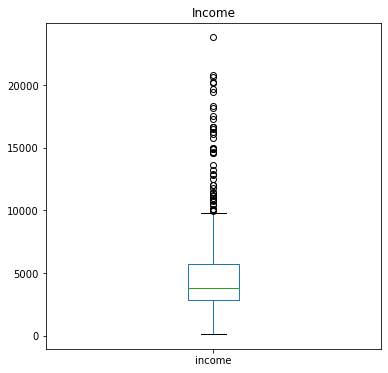

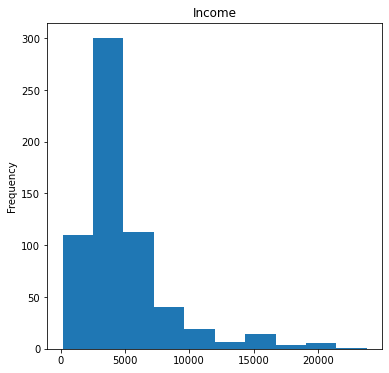

In [17]:
# Plotting the income column again using histogram and boxplot to check whether the outliers have been removed

a1['income'].plot(kind='box',title="Income")
plt.show()
a1['income'].plot(kind='hist',title="Income")
plt.show()
plt.rcParams['figure.figsize']=[6,6]

we can see that even though there are outliers, the outliers > 30000 is replaced with the mean values, so as to reduce the extreme outliers. 
We will not remove all the outliers as they can be the true values.

from the histogram we can infer that the highest number of income is between 0 to 10000.

In [18]:
# Checking whether there are NaN values.
a1['income'].isnull().sum()

0

#### > CO-APPLICANT-INCOME ATTRIBUTE

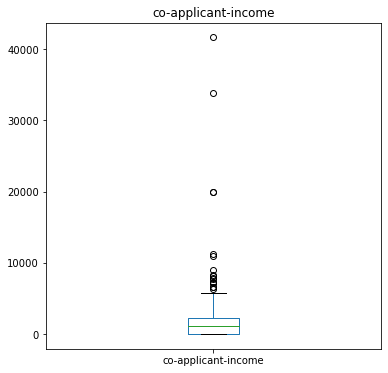

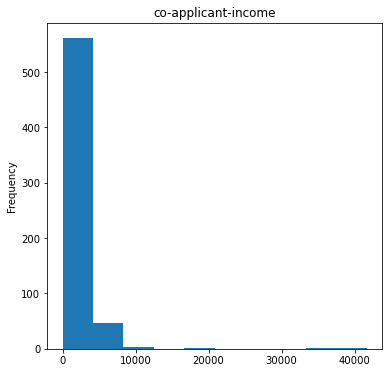

In [19]:
# Plotting the co-applicant-income column using histogram and boxplot to check for the outliers.
a1['co-applicant-income'].plot(kind='box',title="co-applicant-income")
plt.show()
a1['co-applicant-income'].plot(kind='hist',title="co-applicant-income")
plt.show()
plt.rcParams['figure.figsize']=[6,6]

In [20]:
# replacing by mean for values > 10000
a1['co-applicant-income'].values[a1['co-applicant-income'].values > 10000] = a1['co-applicant-income'].mean()

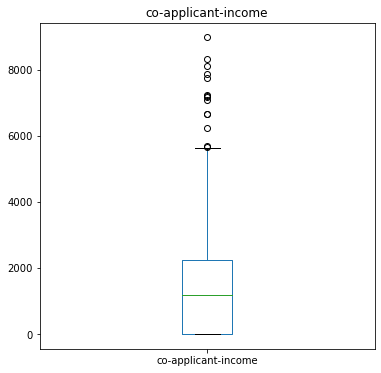

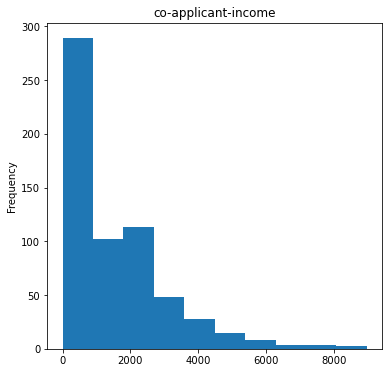

In [21]:
# Plotting the income column using histogram and boxplot to check whether the outliers have been removed
a1['co-applicant-income'].plot(kind='box',title="co-applicant-income")
plt.show()
a1['co-applicant-income'].plot(kind='hist',title="co-applicant-income")
plt.show()
plt.rcParams['figure.figsize']=[6,6]

we are again replacing the extreme outliers with the mean of the attribute as to reduce the extreme skewed.

As co applicant shall not be having income always therefore we can see that it is high number of people of income 0. 

In [22]:
# Checking whether there are NaN values.
a1['co-applicant-income'].isnull().sum()

0

#### > CREDIT-HISTORY ATTRIBUTE

In [23]:
# Checking the unique values in credit-history column
a1['credit-history'].unique()

array([ 1.,  0., nan])

In [24]:
a1['credit-history'].mode()

0    1.0
dtype: float64

In [25]:
# Replacing the NaN values with mode
# a1['credit-history']=a1['credit-history'].replace([np.NaN],[a1['credit-history'].mode()])# does not work
# credit-history is binary where 0 stands for no and 1 is for yes it does not have any outliers.
a1['credit-history'].fillna(a1['credit-history'].mode()[0], inplace=True)

 From the description,we can say that the min is 0 and max is 1 which is binary and replacing it with mean and median will not be meaningfull and hence is being replaced with mode which is the best approach.

In [26]:
# Checking whether the NaN values are replaced with mode
a1['credit-history'].isnull().sum()
#from the below table we can see that the NaN value for credit-history has been replaced by mode and hence is showing 0

0

#### > LOAN-AMOUNT ATTRIBUTE

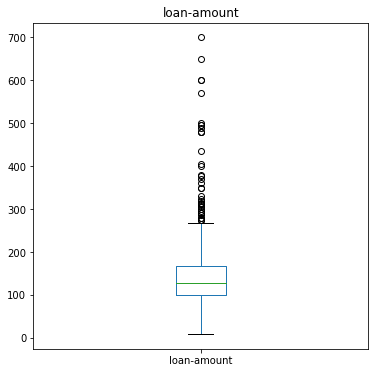

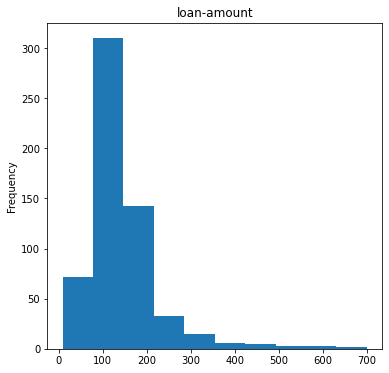

In [27]:
# Plotting the income column using histogram and boxplot to check for the outliers
a1['loan-amount'].plot(kind='box',title='loan-amount')
plt.show()
a1['loan-amount'].plot(kind='hist',title='loan-amount')
plt.show()
plt.rcParams['figure.figsize']=[6,6]

In [28]:
# replacing by mean for values > 10000
a1['loan-amount'].values[a1['loan-amount'].values > 400] = a1['loan-amount'].mean()

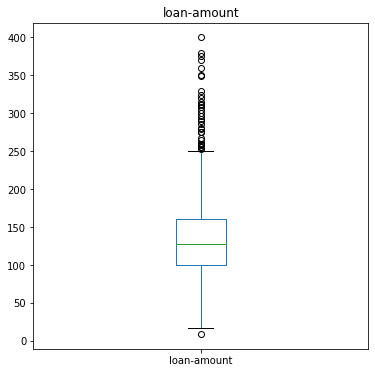

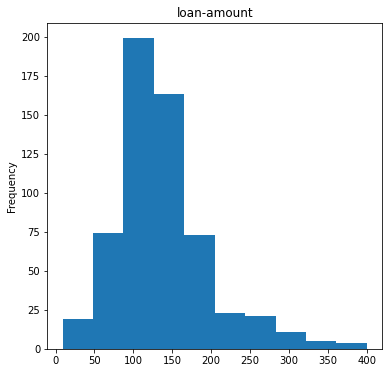

In [29]:
# Plotting the loan-amount column using histogram and boxplot to check for the outliers

a1['loan-amount'].plot(kind='box',title='loan-amount')
plt.show()
a1['loan-amount'].plot(kind='hist',title='loan-amount')
plt.show()
plt.rcParams['figure.figsize']=[6,6]



From the histogram we can see that the most of the loans allowed are between 50 and 200.

In [30]:
# Checking the number of NaN values for the loan-amount column
a1['loan-amount'].isnull().sum()

22

In [31]:
# Replacing the NaN values with the mean
a1['loan-amount']=a1['loan-amount'].replace([np.NaN],[a1['loan-amount'].mean()])

In [32]:
# Checking whether the NaN values are replaced with mean
a1['loan-amount'].isnull().sum()

0

#### > LOAN-DURATION ATTRIBUTE

In [33]:
# Checking for the unique values 
a1['loan-duration'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

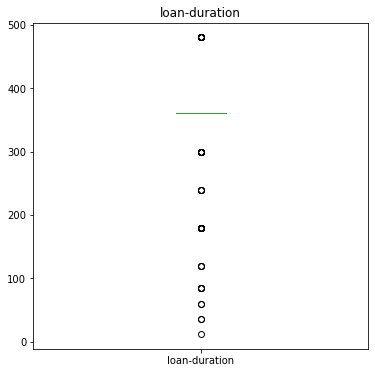

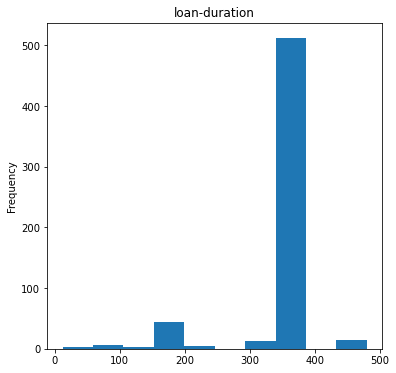

In [34]:
# Plotting the loan-duration column using histogram and boxplot to check for the outliers
a1['loan-duration'].plot(kind='box',title='loan-duration')
plt.show()
a1['loan-duration'].plot(kind='hist',title='loan-duration')
plt.show()
plt.rcParams['figure.figsize']=[6,6]

loan duration has 10 levels and from the histogram we can see that the most of the loans have the duration between 300 and 400. 

In [35]:
# Checking for the NaN values
a1['loan-duration'].isnull().sum()

14

In [36]:
# Replacing the NaN values with mean
a1['loan-duration']=a1['loan-duration'].replace([np.NaN],[a1['loan-duration'].mean()])

In [37]:
# Checking whether the NaN values are replaced with mean
a1['loan-duration'].isnull().sum()

0

 #### > Credit-History 
 
As credit-history is a continuous feature but since it is binary where 0 stands for no and 1 is for yes it does not have any outliers.


In [38]:
a1.describe()

,income,co-applicant-income,loan-amount,loan-duration,credit-history
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4900.223477,1412.704226,137.405017,342.000000,0.855049
std,3453.918635,1677.146372,59.344092,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5701.000000,2250.000000,160.000000,360.000000,1.000000
max,23803.000000,8980.000000,400.000000,480.000000,1.000000


In [39]:
# Checking whether all the NaN values for the continuous features have been replaced
a1.isnull().sum()

loanid                  0
gender                 13
married                 3
dependents             15
education               0
self-employed          32
income                  0
co-applicant-income     0
loan-amount             0
loan-duration           0
credit-history          0
property-area           0
loan-status             0
dtype: int64

# 2.2.2 - Categorical features

Replacing all the categorical attributes with mode and replacing it with mean and median will not be meaningfull and hence is being replaced with mode which is the best approach.


In [40]:
#a1['self-employed']=a1['self-employed'].replace([np.NaN],[a1['self-employed'].mode()])
#a1['dependents']=a1['dependents'].replace([np.NaN],[a1['dependents'].mode()])
#a1['gender']=a1['gender'].replace([np.NaN],[a1['gender'].mode()])
#a1['married']=a1['married'].replace([np.NaN],[a1['married'].mode()])

a1['self-employed'].fillna(a1['self-employed'].mode()[0], inplace=True)
a1['dependents'].fillna(a1['dependents'].mode()[0], inplace=True)
a1['gender'].fillna(a1['gender'].mode()[0], inplace=True)
a1['married'].fillna(a1['married'].mode()[0], inplace=True)

In [41]:
# Checking whether all the NaN values have been replaced
a1.isnull().sum()

loanid                 0
gender                 0
married                0
dependents             0
education              0
self-employed          0
income                 0
co-applicant-income    0
loan-amount            0
loan-duration          0
credit-history         0
property-area          0
loan-status            0
dtype: int64

# 3 - Data Exploration

## 3.1 - Univariate Visualisation

We have seen the histograms of the contineous features and will next explore the categorical features of the data set.

#### > GENDER ATTRIBUTE

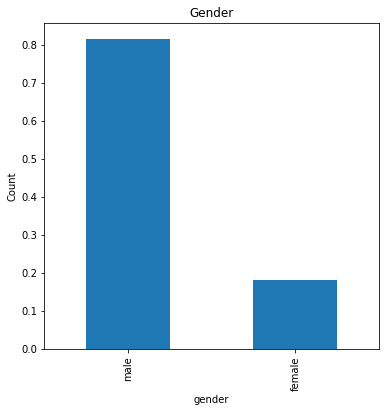

In [42]:
# Plotting the gender column using bar plot since it is the best plot for visualisation

a1['gender'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Gender')
plt.xlabel('gender',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that there were more male as compared to female

#### > MARRIED ATTRIBUTE

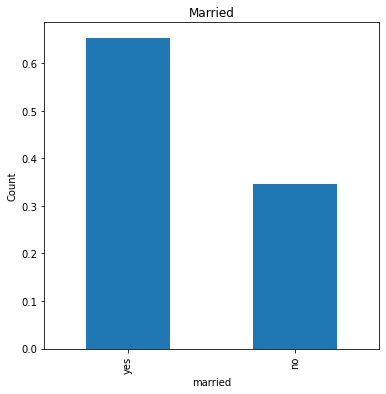

In [43]:
# Plotting the married column using bar plot 
a1['married'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Married')
plt.xlabel('married',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that more people were married than unmarried

#### > DEPENDENTS ATTRIBUTE

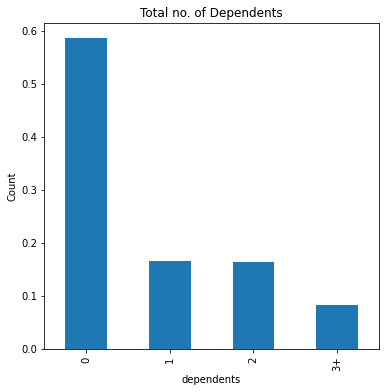

In [44]:
# Plotting the dependents column using bar plot 
a1['dependents'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Total no. of Dependents')
plt.xlabel('dependents',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that people had more of no dependents as compared to 2 or 1 dependent

#### > EDUCATION ATTRIBUTE

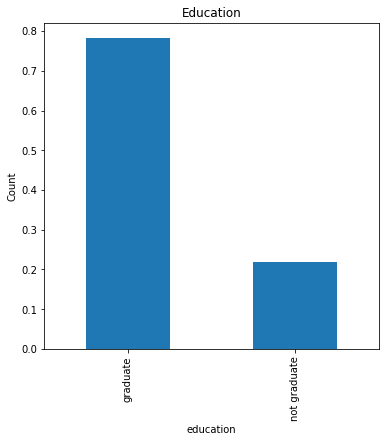

In [45]:
# Plotting the education column using bar plot 
a1['education'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Education')
plt.xlabel('education',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that there were more graduate people than not graduate

#### > SELF-EMPLOYED ATTRIBUTE

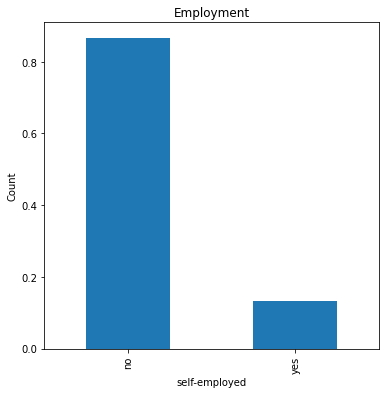

In [46]:
# Plotting the self-employed column using bar plot 
a1['self-employed'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Employment')
plt.xlabel('self-employed',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that people were less self-employed.

#### > PROPERTY-AREA ATTRIBUTE

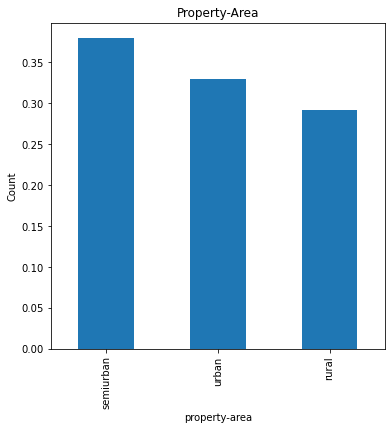

In [47]:
# Plotting the property-area column using bar plot 
a1['property-area'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Property-Area')
plt.xlabel('property-area',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that their were more people in semiurban area as compared to urban and rural areas.

#### > LOAN-STATUS ATTRIBUTE

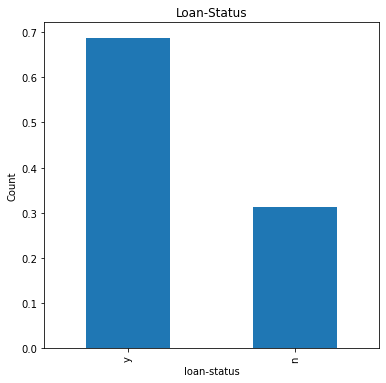

In [48]:
# Plotting the loan-status column using bar plot 
a1['loan-status'].value_counts(normalize=True).plot(kind='bar',fontsize=10,title='Loan-Status')
plt.xlabel('loan-status',size=10)
plt.ylabel('Count',size=10)
plt.show()
plt.rcParams['figure.figsize']=[6,6]

From the plot, we can predict that loan was given to more people than denied.

# 3.2 - Multivariate Visualisation

## 3.2.1 - Barplot of Categorical Features Segregated by loan-status Level

#### > GENDER - LOAN-STATUS

<AxesSubplot:xlabel='gender'>

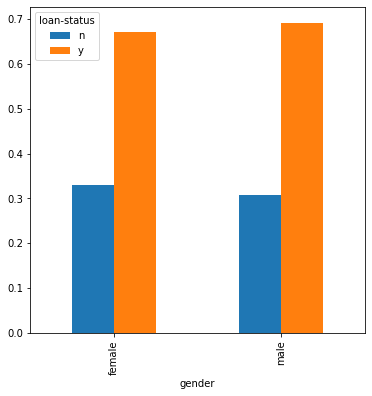

In [49]:
# Plotting gender column using bar plot segregated by loan-status level for better visualisation
g1=pd.crosstab(a1['gender'],a1['loan-status'])
g1.div(g1.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,6))

From the above plot, we can visualise that males have sightly recieved more loan as compared to females

#### > MARRIED - LOAN-STATUS

<AxesSubplot:xlabel='married'>

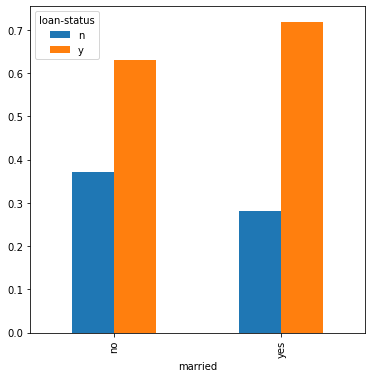

In [50]:
# Plotting married column using bar plot segregated by loan-status level for better visualisation
m1=pd.crosstab(a1['married'],a1['loan-status'])
m1.div(m1.sum(1).astype(float), axis=0).plot(kind="bar",  figsize=(6,6))

From the above plot, we can visualise that married people have recieved more loan compared to unmarried people

#### > DEPENDENTS - LOAN-STATUS

<AxesSubplot:xlabel='dependents'>

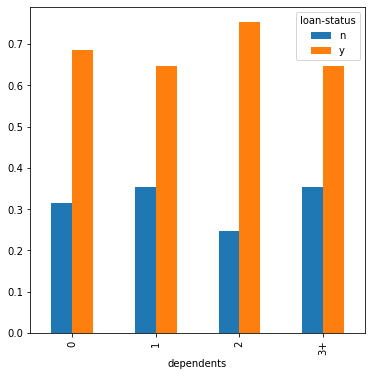

In [51]:
# Plotting dependents column using bar plot segregated by loan-status level for better visualisation
d1=pd.crosstab(a1['dependents'],a1['loan-status'])
d1.div(d1.sum(1).astype(float), axis=0).plot(kind="bar",  figsize=(6,6))

From the above plot, we can visualise that people with 2 dependents have recieved higher loan follwed by no dependency.

#### > EDUCATION - LOAN-STATUS

<AxesSubplot:xlabel='education'>

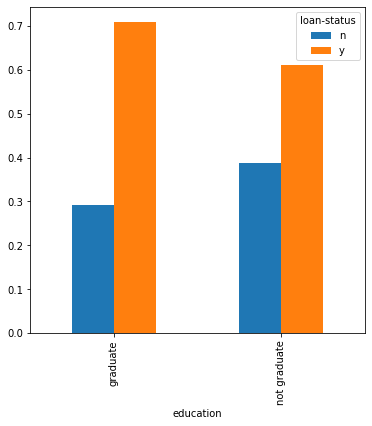

In [52]:
# Plotting education column using bar plot segregated by loan-status level for better visualisation
e1=pd.crosstab(a1['education'],a1['loan-status'])
e1.div(e1.sum(1).astype(float), axis=0).plot(kind="bar",  figsize=(6,6))

From the above plot, we can visualise that graduate people have recieved more loan as compared to non-graduates.

#### > SELF-EMPLOYED - LOAN-STATUS

<AxesSubplot:xlabel='self-employed'>

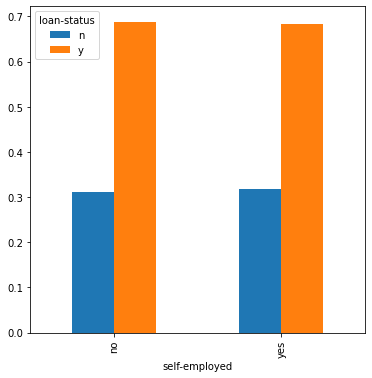

In [53]:
# Plotting self-employed column using bar plot segregated by loan-status level for better visualisation
s1=pd.crosstab(a1['self-employed'],a1['loan-status'])
s1.div(s1.sum(1).astype(float), axis=0).plot(kind="bar",  figsize=(6,6))

From the above plot, we can visualise that loan-status is not dependable on self-employment

#### > PROPERTY-AREA - LOAN-STATUS

<AxesSubplot:xlabel='property-area'>

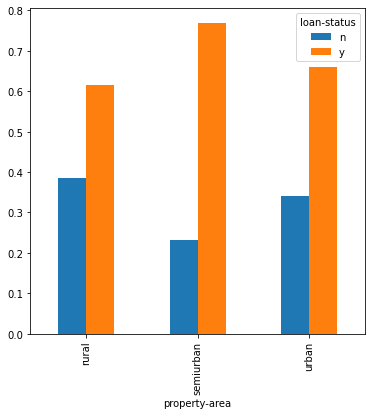

In [54]:
# Plotting property-area column using bar plot segregated by loan-status level for better visualisation
p1=pd.crosstab(a1['property-area'],a1['loan-status'])
p1.div(p1.sum(1).astype(float), axis=0).plot(kind="bar",  figsize=(6,6))

From the above plot, we can visualise that semi-urban area have recieved more loan as compared to urban and rural areas

## 3.2.2 - Barplot of Numeric Features Segregated by loan-status Level

#### > INCOME - LOAN-STATUS

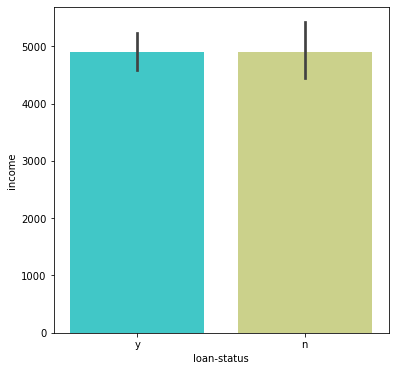

In [55]:
# Plotting income column using bar plot segregated by loan-status level for better visualisation
sns.barplot(x='loan-status',y='income',data=a1,palette='rainbow')
plt.show()
plt.rcParams['figure.figsize']=[5,5]

From the above plot, we can visualise thatloan-status is not dependable on income of a person

#### > CO-APPLICANT-INCOME - LOAN-STATUS

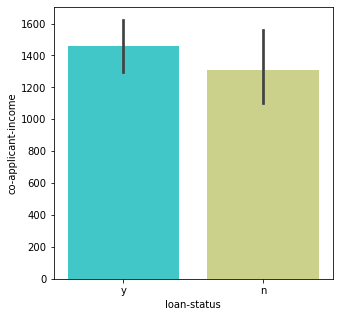

In [56]:
# Plotting co-applicant-income column using bar plot segregated by loan-status level for better visualisation
sns.barplot(x='loan-status',y='co-applicant-income',data=a1,palette='rainbow')
plt.show()
plt.rcParams['figure.figsize']=[5,5]

From the above plot, we can visualise that the person whose co-applicate-income is higher, have recieved loans as compared to lower co-applicant-income

## 3.2.3 - Interaction between Categorical and Numeric Features

#### > SELF-EMPLOYED - CREDIT-HISTORY

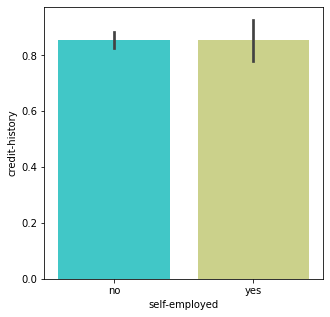

In [57]:
# Plotting self-employed attribute with credit-history attribute to check whether the people who are self-employed have better credit-history or who are not self-employed.
sns.barplot(x='self-employed',y='credit-history',data=a1,palette='rainbow')
plt.rcParams['figure.figsize']=[5,5]

From the plot, we can predict that credit-history is not dependent on whether the person is self-employed or not

#### > PROPERTY-AREA - LOAN-AMOUNT

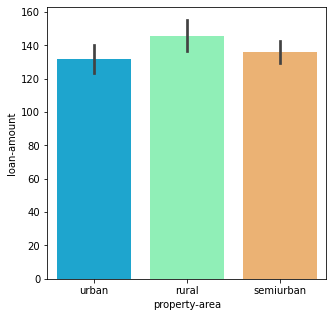

In [58]:
# Plotting property-area attribute with loan-amount attribute to check whether the loan-amount depends on the property-area

sns.barplot(x='property-area',y='loan-amount',data=a1,palette='rainbow')
plt.rcParams['figure.figsize']=[5,5]

From the plot, we can visualise that people from the rural area have received higher loan amount as compared to semi-urban and urban property-area

## 3.2.4 - Pairwise Scatter Plots between Two Numeric Features

#### > LOAN-DURATION - LOAN-AMOUNT

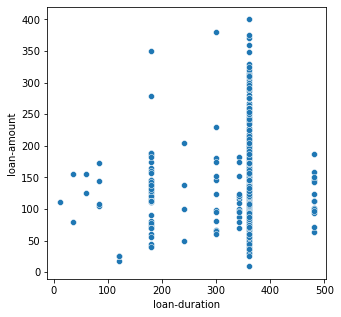

In [59]:
# Plotting a scatter plot between loan-duration and loan-amount to check which loan-duration has the highest loan-amount
sns.scatterplot(x='loan-duration',y='loan-amount',data=a1,palette='rainbow')
plt.rcParams['figure.figsize']=[5,5]

From the above scatter plot, we can visualise that the loan-duration between 300-400 years has the highest loan-amount followed by 100-200 years

#### > INCOME - LOAN-AMOUNT

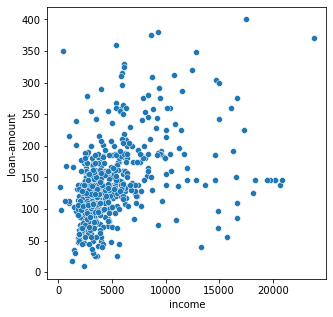

In [60]:
# Plotting a scatter plot between income and loan-amount to check the relation between them
sns.scatterplot(x='income',y='loan-amount',data=a1,palette='rainbow')
plt.rcParams['figure.figsize']=[5,5]

From the above scatter plot, we can visualise that the income range from 1000-8000 have recieved the loan-amount as compared to other income bands

## 3.2.5 - Matrix Scatter Plots between all the Numeric Features

In [61]:
#from pandas.plotting.scatter_matrix import scatter_matrix
from pandas.plotting import scatter_matrix
#import 'pandas.plotting.scatter_matrix'

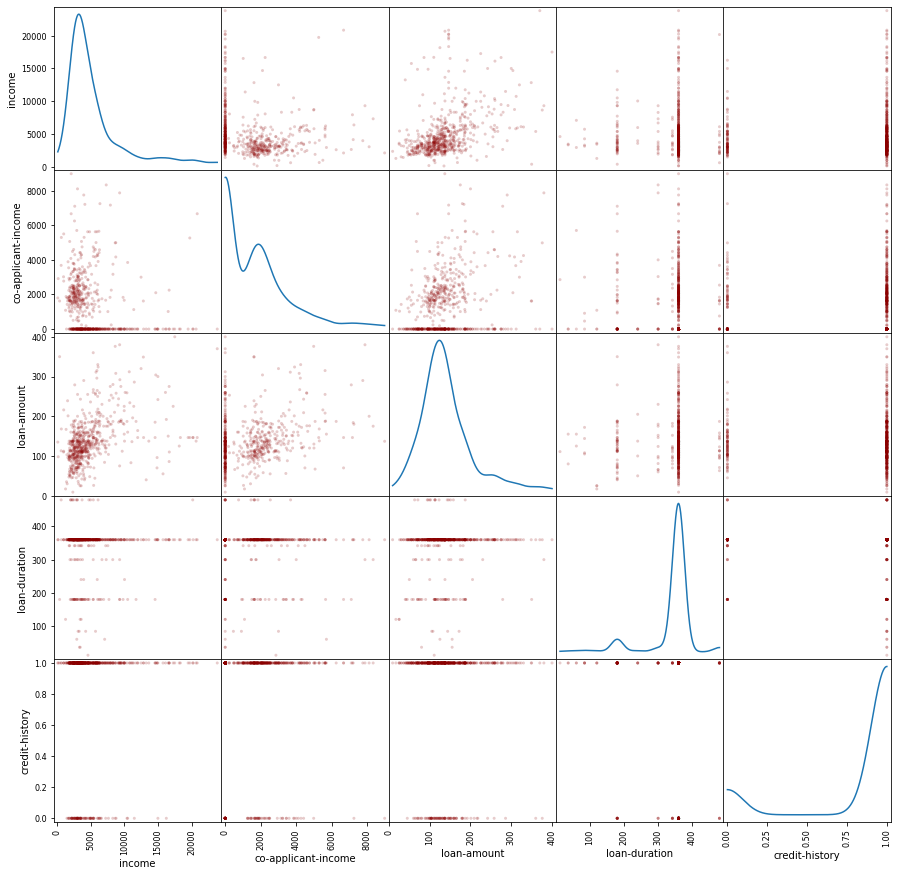

In [62]:
scatter_matrix(a1[['income','co-applicant-income','loan-amount','loan-duration','credit-history' ]],
               figsize=(15,15),alpha=0.2,diagonal='density',color='darkred')
plt.show()


A Matrix Scatter plot is a nice representation of the co-relation between all the numeric columns of the data. It can be seen that the Income and Loan-amount have some positive trend present.

# 4 - Summary

In Phase 1, the data set Loan Prediction had some mistakes which is fixed in phase 1, by which the data set becomes fit to carry on the next phase which is nessary as a uncleared data would lead to wrong predictions and hence it is nessary to make sure the data is fit and clean by removing all the outliers and missing values according to the columns respectively.
We can say by the visualisations that few attributes are dependent on another attribute and it also includes indipendent attributes which affect the other attributes and the target is dependent on the attributes of the data set.

## Thank you
### Tarun.S.Sarode